In [ ]:
#2025.11.20

In [1]:
#numpy基于数组的算法比python 列表快10-100倍
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))
print("Numpy 耗时：")
%time for _ in range(10):my_arr2 = my_arr * 2
print("Python List 耗时：")
%time for _ in range(10):my_list2 = [x * 2 for x in my_list]

Numpy 耗时：
CPU times: total: 46.9 ms
Wall time: 46.5 ms
Python List 耗时：
CPU times: total: 1.5 s
Wall time: 1.53 s


In [2]:
#4.1numpy ndarray
#创建数组  特点：同质性（元素必须是相同类型）
data2 = [[1,2,3,4],[5,6,7,8]] 
arr2 = np.array(data2)
print(f"数组内容:\n{arr2}")
print(f"维度 (ndim): {arr2.ndim}")
print(f"形状 (shape): {arr2.shape}")
print(f"类型 (dtype): {arr2.dtype}")

数组内容:
[[1 2 3 4]
 [5 6 7 8]]
维度 (ndim): 2
形状 (shape): (2, 4)
类型 (dtype): int64


In [3]:
#把8改成8.5 dtype的变化：
data2 = [[1,2,3,4],[5,6,7,8.5]] 
arr2 = np.array(data2)
print(f"数组内容:\n{arr2}")
print(f"维度 (ndim): {arr2.ndim}")
print(f"形状 (shape): {arr2.shape}")
print(f"类型 (dtype): {arr2.dtype}")

数组内容:
[[1.  2.  3.  4. ]
 [5.  6.  7.  8.5]]
维度 (ndim): 2
形状 (shape): (2, 4)
类型 (dtype): float64


In [7]:
#快速创建
print(np.zeros(10)) #zeros
print(np.ones((3,6)))
print(np.empty((2,3,2)))   #empty不一定都是0  2个3*2
print(np.arange)
#range 和 arange区别 前者是迭代器，需要用list()才能看到内容 后者是数组且支持向量化运算

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[[1.30674021e-311 2.47032823e-322]
  [0.00000000e+000 0.00000000e+000]
  [1.37961302e-306 5.64233733e-067]]

 [[7.42380062e-091 5.79795887e+170]
  [5.51292489e+169 1.80361313e+185]
  [3.99910963e+252 1.79454988e-052]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [10]:
#astype
arr = np.array([1,2,3,4,5])
print(f"原式类型：{arr.dtype}")
float_arr = arr.astype(np.float64)
print(f'新类型：{float_arr.dtype}')
print(f'新数组内容：{float_arr}')

原式类型：int64
新类型：float64
新数组内容：[1. 2. 3. 4. 5.]


In [14]:
#把字符串数字变真数字
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype='S')
converted_arr = numeric_strings.astype(float)
print(converted_arr)

[ 1.25 -9.6  42.  ]


In [15]:
#如果数组里有字符转成浮点数会发生？
num = np.array(['1.2','whoops'],dtype='S')
converted_num = num.astype(float)
print(converted_num)

ValueError: could not convert string to float: np.bytes_(b'whoops')

In [18]:
#简写（不常用）
empty_uint32 = np.empty(8, dtype='u4') #u4指umsigned int 4是字节 bit=4*8=32
empty_uint32

array([   0,    1,    0,  615, 1720,    0,  768,    0], dtype=uint32)

In [16]:
#数组计算
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
print(arr + arr)
print(1/arr)
#比较
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2 > arr)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[False  True False]
 [ True False  True]]


In [19]:
#basic slicing and broadcasting
#切片和python[1:4]类似，但python切片是复制原片，这里是直接取出来再放回去会对原来的列表产生影响。要使用复制的话.copy()
arr = np.arange(10)
print(f"原始数组：{arr}")
print(f'切片 arr[5:8]:{arr[5:8]}')
arr[5:8] = 12 #在Python列表中，你不能直接把一个数字赋值给一个切片，但在NumPy里可以
print(f'赋值后的数组：{arr}')

原始数组：[0 1 2 3 4 5 6 7 8 9]
切片 arr[5:8]:[5 6 7]
赋值后的数组：[ 0  1  2  3  4 12 12 12  8  9]


In [20]:
#the view trap
#创造一个切片变量
arr_slice = arr[5:8]
print(f"切片变量: {arr_slice}")
#修改其第二个元素
arr_slice[1] = 12345
print(f"修改后的切片: {arr_slice}")
#原始数组的变化
print(f"原始数组 arr: {arr}")

切片变量: [12 12 12]
修改后的切片: [   12 12345    12]
原始数组 arr: [    0     1     2     3     4    12 12345    12     8     9]


In [ ]:
#多维数组切片
arr2d[0,2] #第0行，第二列
arr3d[:2,1:] #前两行，第二列到结束

In [ ]:
arr = np.array([1, 2, 3])
#如果运行arr[0] = 3.14,然后打印arr 会看到：【3,2,3】（截断取整）

In [22]:
#11.21
#4.2 ufunc
#unary sqrt exp
import numpy as np
arr = np.arange(10)
print(f"平方根：\n{np.sqrt(arr)}")
print(f'指数：\n{np.exp(arr)}')

平方根：
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
指数：
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [23]:
#binary 
x= np.random.randn(8)
y= np.random.randn(8)
print(f'数组 x:\n{x}')
print(f'数组 y:\n{y}')
print(f'元素级最大值：\n{np.maximum(x,y)}')  #max是计算所有数值中最大的一个，不是元素级运算（element-wise）

数组 x:
[-0.69544963  0.37534957  0.32405866 -0.37383534  0.12956708 -0.22017045
 -0.34110572  0.51079659]
数组 y:
[-0.23295975 -0.88969595  0.42040902  1.34466572  0.25569891  1.23291782
 -0.52216085  0.6109752 ]
元素级最大值：
[-0.23295975  0.37534957  0.42040902  1.34466572  0.25569891  1.23291782
 -0.34110572  0.6109752 ]


In [24]:
#meshgrid  网格生成
points  = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points,points)
print(f"xs 的形状{xs.shape}")
print(f'ys 的前五行:\n{ys[:5,:5]}')

xs 的形状(1000, 1000)
ys 的前五行:
[[-5.   -5.   -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 -4.98 -4.98]
 [-4.97 -4.97 -4.97 -4.97 -4.97]
 [-4.96 -4.96 -4.96 -4.96 -4.96]]


In [25]:
z = np.sqrt(xs**2 + ys ** 2)
print(f"z 的形状{z.shape}")
print(f'计算结果z:\n{z}')

z 的形状(1000, 1000)
计算结果z:
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


In [26]:
#逻辑清洗np.where 实现逻辑选择 np.where(cond,a,b) cond为true a生效否则为b  
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond,xarr,yarr)
print(result)
#np.where不像mean（）等是数组的方法而是一个顶级函数，需要把处理的数据作为参数传进去，不能写成x.np.where

[1.1 2.2 1.3 1.4 2.5]


In [28]:
arr = np.random.randn(4,4)
print(f'原始数据：{arr}')
#清洗数据：正数变2，负数变-2
cleaned = np.where(arr>0,2,-2)
print(f"清洗后{cleaned}")

原始数据：[[ 0.74792763 -0.92656529  0.91354773  1.87410313]
 [ 0.61385704 -0.32779857  1.12433522  0.27892522]
 [ 0.41928241  0.03790241  0.16871031 -0.65030177]
 [ 1.95809379  0.6964502  -0.23869639 -0.49122539]]
清洗后[[ 2 -2  2  2]
 [ 2 -2  2  2]
 [ 2  2  2 -2]
 [ 2  2 -2 -2]]


In [29]:
#mathematical and statistical methods
arr = np.random.randn(5,4)
print(f'原始数据：{arr}')
print(f'全局平均值：{arr.mean()}')
#把5行压扁成1行
print(f'每列总和（axis=0）：{arr.sum(axis=0)}')  #axis=0：沿着行往下算，压缩行，得到每列的统计结果；axis=1反之
print(f'每行平均值（axis=1）：{arr.mean(axis=1)}') 

原始数据：[[ 1.22267884  0.7642541   0.98206767 -1.15682926]
 [-0.97858397 -0.44797951 -0.53666259  1.09556108]
 [ 0.7675177   0.21173744  1.40520402 -0.99781665]
 [ 0.72424425 -1.2352545   1.28156753  1.34609514]
 [-0.49868732  0.91086125 -0.14600328  1.15429946]]
全局平均值：0.29341356880374425
每列总和（axis=0）：[1.23716949 0.20361878 2.98617334 1.44130976]
每行平均值（axis=1）：[ 0.45304284 -0.21691625  0.34666063  0.52916311  0.35511753]


In [30]:
#boolean arrays  sum/any/all
arr = np.random.randn(100)
#统计正数的个数
print(f'正数的个数：{(arr>0).sum()}')
#看是否含有true
bools = np.array([False,False,True,False])
print(f'有一个是True吗？{bools.any()}')
print(f'全都是True吗？{bools.all()}')

正数的个数：51
有一个是True吗？True
全都是True吗？False


In [33]:
#11.22
#Boolean indexing  和切片的视图不一样这个是复制一个数组进行修改 像一个滤网筛选出True的
import numpy as np
names = np.array(['Bob','Joe','Will','Bob', 'Will','Joe','Joe'])
data = np.random.randn(7,4)
print(f"Names:{names}")
print(f"Data:{data}")
#进行向量化比较，制造一个全是True/False的数组mask
mask = (names=='Bob')
print(f'mask：{mask}')
#选出Bob的行
print(f"Bob的数据：{data[mask]}")

Names:['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
Data:[[-1.68441031e+00 -5.05061298e-01  2.58605701e-02  1.41045106e+00]
 [-8.30896755e-01 -2.17677108e-01 -5.62642197e-01 -3.49612881e-01]
 [ 1.82592180e-01  4.98234824e-01  6.40707513e-05 -3.03921927e-02]
 [-1.10267707e+00  6.48619358e-01 -8.03879532e-01  1.50305456e+00]
 [ 2.68272502e+00  1.64758238e+00  7.09845976e-01  1.74722657e-01]
 [-1.83070295e-01 -8.14112964e-01 -6.16222561e-02  5.13729702e-01]
 [ 1.34737026e-01  2.67341917e-01 -1.17824003e+00  4.60350230e-01]]
mask：[ True False False  True False False False]
Bob的数据：[[-1.68441031 -0.5050613   0.02586057  1.41045106]
 [-1.10267707  0.64861936 -0.80387953  1.50305456]]


In [34]:
#长度不不匹配
import numpy as np
names = np.array(['Bob','Joe','Will','Bob', 'Will','Joe','Joe'])
data = np.random.randn(5,4)  #data只有5行，names有7行
print(f"Names:{names}")
print(f"Data:{data}")
#进行向量化比较，制造一个全是True/False的数组mask
mask = (names=='Bob')
print(f'mask：{mask}')
#选出Bob的行
print(f"Bob的数据：{data[mask]}")

Names:['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
Data:[[ 2.10996078  0.4481098   0.68352717  2.14052461]
 [ 0.03363617 -0.39433042  0.21669752 -0.53449134]
 [ 1.53963619 -0.02223651  0.98692622  0.31893271]
 [-1.91161175  1.12457532  1.41311387  0.47729278]
 [-1.23666384  0.68445135  0.11626232  0.70112073]]
mask：[ True False False  True False False False]


IndexError: boolean index did not match indexed array along axis 0; size of axis is 5 but size of corresponding boolean axis is 7

In [36]:
#组合逻辑与赋值  不能用and or 要用符号& |
names = np.array(['Bob','Joe','Will','Bob', 'Will','Joe','Joe'])
data = np.random.randn(7,4)
mask2 = (names=='Bob')|(names == 'Will')  #注意加括号
print(f"Bob或Will的数据：{data[mask2]}")

data[data<0] = 0
print(f'清洗后的数据：{data}')

Bob或Will的数据：[[-0.59330806  0.46752158  1.70228907 -0.19180514]
 [-2.3291771  -0.7152996   0.40821058 -2.24267967]
 [ 0.98350676 -0.68036907 -1.7196254   1.85298048]
 [ 0.03060292 -1.71279509  0.92604538  1.23690668]]
清洗后的数据：[[0.         0.46752158 1.70228907 0.        ]
 [0.         0.10307204 0.         0.74668705]
 [0.         0.         0.40821058 0.        ]
 [0.98350676 0.         0.         1.85298048]
 [0.03060292 0.         0.92604538 1.23690668]
 [0.38967111 0.71473412 0.23694821 0.        ]
 [0.7740504  0.51611837 0.0970541  0.13357756]]


In [41]:
#fancy indexing 有两个[]不然会认为是行，列，二维报错且达不到目的
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print('原始矩阵：',arr)
#fancy indexing,选出特定行并打乱顺序
print(f'选出的行：{arr[[4,3,0,6]]}')
print(f'负数索引：{arr[[-1,-5]]}')

原始矩阵： [[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
选出的行：[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
负数索引：[[7. 7. 7. 7.]
 [3. 3. 3. 3.]]


In [42]:
#sort
arr = np.random.randn(5,3)
print("原始矩阵：",arr)
#对每一行内部进行排序
arr.sort(axis=1)
print("排序后：",arr)

原始矩阵： [[ 0.1352388  -0.84222023  0.92984347]
 [-0.54364749 -0.70958968 -0.95282698]
 [ 0.13156706  0.45062377 -1.04754542]
 [ 0.86280145 -1.77481225  0.78784928]
 [ 0.59590183 -0.11474945 -0.90503522]]
排序后： [[-0.84222023  0.1352388   0.92984347]
 [-0.95282698 -0.70958968 -0.54364749]
 [-1.04754542  0.13156706  0.45062377]
 [-1.77481225  0.78784928  0.86280145]
 [-0.90503522 -0.11474945  0.59590183]]


In [46]:
#unique and set logic
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
#快速去重并排序：
print(f'唯一值：{np.unique(names)}')
#检查包含关系isin
values = np.array(['Bob','Will','Joe'])
mask = np.isin(values,['Bob','Will'])
print(f"包含检查：{mask}")

唯一值：['Bob' 'Joe' 'Will']
包含检查：[ True  True False]


In [53]:
#random walk
#从 0 开始，每一步以 50% 的概率 +1，50% 的概率 -1。模拟 1000 步，算离起点最远走了多远。 （自己写的）
import numpy as np
arr = np.random.randn(1000)
real_arr = np.where((arr>0),1,-1)
walk = real_arr.cumsum()
distance = walk.max()
print(distance)

23


最小位置: -32
最大位置: 26


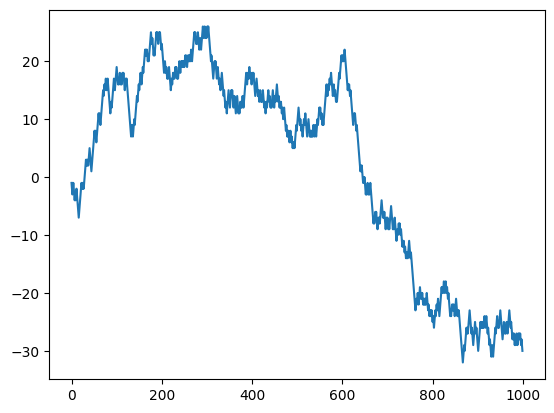

In [7]:
#ai版
import matplotlib.pyplot as plt  # 我们顺便画个图
import numpy as np

# 1. 抛 1000 次硬币
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) # 生成 0 或 1

# 2. 数据转换：如果 是 1 就步进 1，如果是 0 就步进 -1 (用 np.where!)
steps = np.where(draws > 0, 1, -1)

# 3. 累加：计算每一步的绝对位置
walk = steps.cumsum()

# 4. 看看我们走到了哪里
print(f"最小位置: {walk.min()}")
print(f"最大位置: {walk.max()}")

# 5. (可选) 画出来看看，感受一下随机漫步
plt.plot(walk)

In [2]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\envs\ds_env\python.exe


In [4]:
import sys
!{sys.executable} -m pip install matplotlib

In [5]:
import matplotlib.pyplot as plt
print("matplotlib 导入成功！")

matplotlib 导入成功！


In [11]:
abs_walk = np.abs(walk)
mask = abs_walk>=10
mask.argmax()

np.int64(59)

In [12]:
#11.23
#linear algebra
import numpy as np
x= np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])

print('x的形状：',x.shape)
print("y的形状：",y.shape)
result = np.dot(x,y)
print(f'矩阵乘法结果：{result}')
print(f'使用@符号的结果：{x@y}')  #@是dot 语法糖

x的形状： (2, 3)
y的形状： (3, 2)
矩阵乘法结果：[[ 28.  64.]
 [ 67. 181.]]
使用@符号的结果：[[ 28.  64.]
 [ 67. 181.]]


In [14]:
#File input and output with array  numpy的专属格式：.npy
arr = np.arange(10)
np.save('my_array',arr)  #会自动新建一个my_array
print("保存成功！请去你的文件夹里看看有没有 my_array.npy")
#读取
arr_loaded = np.load('my_array.npy')
print(f"读取回来的数组: {arr_loaded}")

保存成功！请去你的文件夹里看看有没有 my_array.npy
读取回来的数组: [0 1 2 3 4 5 6 7 8 9]


In [20]:
#综合练习
import numpy as np
grades = np.random.randint(40,101,[5,4])
print("原始成绩：",grades)
grades_mean = grades.mean(axis=1)
print("平均分:",grades_mean)
mask = grades<60
mask.any(axis=1)
change_gra = np.where(grades<60,60,grades)
print("\n加分后成绩:\n", change_gra)
gra_sum = change_gra.sum(axis=1)
np.sort(gra_sum)[::-1]  #[::-1]从大到小排

原始成绩： [[ 83  51  51  85]
 [ 87  44  86  69]
 [ 67  48  47  59]
 [ 61  82  81  79]
 [100  92  68  45]]
平均分: [67.5  71.5  55.25 75.75 76.25]

加分后成绩:
 [[ 83  60  60  85]
 [ 87  60  86  69]
 [ 67  60  60  60]
 [ 61  82  81  79]
 [100  92  68  60]]


array([320, 303, 302, 288, 247])